# Gradient boosting machine
**Important**: Change the kernel to *PROJECT_NAME local*. You can do this from the *Kernel* menu under *Change kernel*.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import pickle
import os
import scipy.stats as st
from itertools import combinations

In [2]:
from azureml.logging import get_azureml_logger
run_logger = get_azureml_logger()
run_logger.log('amlrealworld.timeseries.gbm','true')

In [3]:
model_name = "gbm"
aml_dir = os.environ['AZUREML_NATIVE_SHARE_DIRECTORY']
train = pd.read_csv(os.path.join(aml_dir, 'nyc_demand_train.csv'), parse_dates=['timeStamp'])

Use randomised search to find optimal hyperparameters. This model will take about 5 minutes to train. The quality of the solution may be improved by increasing the number of iterations in the randomized search, at the expense of increased training times.

In [4]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [5]:
regr = GradientBoostingRegressor()
tscv = TimeSeriesSplit(n_splits=3)

In [6]:
param_dist = {'n_estimators': st.randint(3, 100),
                'learning_rate': st.uniform(0.01, 0.1),
                'max_depth': range(2,31),
                'min_samples_leaf': st.randint(1, 100),
                'min_samples_split': st.randint(2, 50),
                'max_features': range(3,X.shape[1]+1),
                'subsample': st.uniform(0.1, 0.9)
             }
regr_cv = RandomizedSearchCV(estimator=regr,
            param_distributions=param_dist,
            n_iter=50,
            cv=tscv,
            scoring='neg_mean_squared_error',
            verbose=2,
            n_jobs=-1)
regr_pipe = Pipeline([('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] min_samples_split=32, learning_rate=0.0899329354879, n_estimators=91, max_features=16, subsample=0.212910047009, min_samples_leaf=76, max_depth=28 
[CV] min_samples_split=32, learning_rate=0.0899329354879, n_estimators=91, max_features=16, subsample=0.212910047009, min_samples_leaf=76, max_depth=28 
[CV]  min_samples_split=32, learning_rate=0.0899329354879, n_estimators=91, max_features=16, subsample=0.212910047009, min_samples_leaf=76, max_depth=28, total=   1.2s
[CV] min_samples_split=32, learning_rate=0.0899329354879, n_estimators=91, max_features=16, subsample=0.212910047009, min_samples_leaf=76, max_depth=28 
[CV]  min_samples_split=32, learning_rate=0.0899329354879, n_estimators=91, max_features=16, subsample=0.212910047009, min_samples_leaf=76, max_depth=28, total=   3.7s
[CV] min_samples_split=24, learning_rate=0.0436389173962, n_estimators=3, max_features=5, subsample=0.303892508741, min_samples_leaf=14, max_de

[CV]  min_samples_split=8, learning_rate=0.05643835182, n_estimators=13, max_features=12, subsample=0.194840875232, min_samples_leaf=14, max_depth=10, total=   1.4s
[CV] min_samples_split=42, learning_rate=0.0851500797591, n_estimators=97, max_features=10, subsample=0.244957853715, min_samples_leaf=65, max_depth=2 
[CV]  min_samples_split=42, learning_rate=0.0851500797591, n_estimators=97, max_features=10, subsample=0.244957853715, min_samples_leaf=65, max_depth=2, total=   0.3s
[CV] min_samples_split=42, learning_rate=0.0851500797591, n_estimators=97, max_features=10, subsample=0.244957853715, min_samples_leaf=65, max_depth=2 
[CV]  min_samples_split=42, learning_rate=0.0851500797591, n_estimators=97, max_features=10, subsample=0.244957853715, min_samples_leaf=65, max_depth=2, total=   0.7s
[CV] min_samples_split=42, learning_rate=0.0851500797591, n_estimators=97, max_features=10, subsample=0.244957853715, min_samples_leaf=65, max_depth=2 
[CV]  min_samples_split=42, learning_rate=0.0

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.8s


[CV]  min_samples_split=25, learning_rate=0.0474524003396, n_estimators=33, max_features=8, subsample=0.223462479704, min_samples_leaf=4, max_depth=28, total=   4.3s
[CV] min_samples_split=11, learning_rate=0.0864546171066, n_estimators=87, max_features=10, subsample=0.98567214945, min_samples_leaf=84, max_depth=26 
[CV]  min_samples_split=43, learning_rate=0.0352944979591, n_estimators=9, max_features=12, subsample=0.69557549495, min_samples_leaf=36, max_depth=29, total=   2.1s
[CV] min_samples_split=11, learning_rate=0.0864546171066, n_estimators=87, max_features=10, subsample=0.98567214945, min_samples_leaf=84, max_depth=26 
[CV]  min_samples_split=11, learning_rate=0.0864546171066, n_estimators=87, max_features=10, subsample=0.98567214945, min_samples_leaf=84, max_depth=26, total=   3.2s
[CV] min_samples_split=11, learning_rate=0.0864546171066, n_estimators=87, max_features=10, subsample=0.98567214945, min_samples_leaf=84, max_depth=26 
[CV]  min_samples_split=11, learning_rate=0.0

[CV]  min_samples_split=23, learning_rate=0.108664063042, n_estimators=29, max_features=8, subsample=0.809800196567, min_samples_leaf=83, max_depth=19, total=   1.6s
[CV] min_samples_split=23, learning_rate=0.108664063042, n_estimators=29, max_features=8, subsample=0.809800196567, min_samples_leaf=83, max_depth=19 
[CV]  min_samples_split=5, learning_rate=0.107224013716, n_estimators=40, max_features=14, subsample=0.34674736206, min_samples_leaf=37, max_depth=27, total=   5.6s
[CV] min_samples_split=6, learning_rate=0.107958276278, n_estimators=29, max_features=5, subsample=0.772430775871, min_samples_leaf=99, max_depth=10 
[CV]  min_samples_split=6, learning_rate=0.107958276278, n_estimators=29, max_features=5, subsample=0.772430775871, min_samples_leaf=99, max_depth=10, total=   0.5s
[CV] min_samples_split=6, learning_rate=0.107958276278, n_estimators=29, max_features=5, subsample=0.772430775871, min_samples_leaf=99, max_depth=10 
[CV]  min_samples_split=6, learning_rate=0.1079582762

[CV]  min_samples_split=21, learning_rate=0.0685989224309, n_estimators=42, max_features=10, subsample=0.826395103512, min_samples_leaf=56, max_depth=12, total=   1.7s
[CV]  min_samples_split=49, learning_rate=0.0797712592783, n_estimators=87, max_features=13, subsample=0.45028177197, min_samples_leaf=99, max_depth=21, total=   9.3s
[CV] min_samples_split=21, learning_rate=0.0685989224309, n_estimators=42, max_features=10, subsample=0.826395103512, min_samples_leaf=56, max_depth=12 
[CV] min_samples_split=21, learning_rate=0.0685989224309, n_estimators=42, max_features=10, subsample=0.826395103512, min_samples_leaf=56, max_depth=12 
[CV]  min_samples_split=21, learning_rate=0.0685989224309, n_estimators=42, max_features=10, subsample=0.826395103512, min_samples_leaf=56, max_depth=12, total=   3.7s
[CV] min_samples_split=41, learning_rate=0.0750863339301, n_estimators=8, max_features=16, subsample=0.483343296255, min_samples_leaf=27, max_depth=4 
[CV]  min_samples_split=41, learning_rat

[CV]  min_samples_split=32, learning_rate=0.0913145430668, n_estimators=64, max_features=16, subsample=0.262891779608, min_samples_leaf=36, max_depth=4, total=   2.0s
[CV] min_samples_split=14, learning_rate=0.0181932290522, n_estimators=81, max_features=4, subsample=0.379954704075, min_samples_leaf=22, max_depth=9 
[CV]  min_samples_split=24, learning_rate=0.101787116969, n_estimators=65, max_features=8, subsample=0.942494563064, min_samples_leaf=44, max_depth=14, total=  11.7s
[CV] min_samples_split=14, learning_rate=0.0181932290522, n_estimators=81, max_features=4, subsample=0.379954704075, min_samples_leaf=22, max_depth=9 
[CV]  min_samples_split=14, learning_rate=0.0181932290522, n_estimators=81, max_features=4, subsample=0.379954704075, min_samples_leaf=22, max_depth=9, total=   1.0s
[CV] min_samples_split=14, learning_rate=0.0181932290522, n_estimators=81, max_features=4, subsample=0.379954704075, min_samples_leaf=22, max_depth=9 
[CV]  min_samples_split=14, learning_rate=0.0181

[CV]  min_samples_split=12, learning_rate=0.102781174935, n_estimators=30, max_features=12, subsample=0.959688157706, min_samples_leaf=98, max_depth=8, total=   6.1s
[CV] min_samples_split=37, learning_rate=0.0912767635654, n_estimators=91, max_features=5, subsample=0.616792625428, min_samples_leaf=85, max_depth=7 
[CV]  min_samples_split=37, learning_rate=0.0912767635654, n_estimators=91, max_features=5, subsample=0.616792625428, min_samples_leaf=85, max_depth=7, total=   2.4s
[CV] min_samples_split=41, learning_rate=0.0777783106792, n_estimators=11, max_features=16, subsample=0.27815867722, min_samples_leaf=25, max_depth=24 
[CV]  min_samples_split=41, learning_rate=0.0777783106792, n_estimators=11, max_features=16, subsample=0.27815867722, min_samples_leaf=25, max_depth=24, total=   0.2s
[CV] min_samples_split=41, learning_rate=0.0777783106792, n_estimators=11, max_features=16, subsample=0.27815867722, min_samples_leaf=25, max_depth=24 
[CV]  min_samples_split=41, learning_rate=0.07

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.3min finished


Pipeline(memory=None,
     steps=[('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
         ...=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2))])

In [7]:
with open(os.path.join(aml_dir, model_name + '.pkl'), 'wb') as f:
    pickle.dump(regr_pipe, f)

Cross validation results

In [8]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score', inplace=True)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
32,10.673894,0.058723,-3470.255637,-1705.216968,0.0889935,26,11,55,15,91,...,-5601.893990,-2313.138987,-2502.137511,-1574.218218,-2306.735411,-1228.293699,6.311879,0.007487,1509.405412,452.469394
5,2.827658,0.018645,-3768.628710,-2718.154806,0.0857043,6,10,4,46,88,...,-4900.485568,-2817.478903,-3209.162615,-2664.743022,-3196.237949,-2672.242494,1.429290,0.001020,800.361052,70.299444
36,6.361708,0.043759,-3825.139774,-1762.640426,0.101787,14,8,44,24,65,...,-5857.921353,-2253.997255,-2939.367880,-1686.214937,-2678.130090,-1347.709085,4.043549,0.011147,1441.344744,373.916393
13,8.871569,0.056105,-4102.843133,-2520.943496,0.0864546,26,10,84,11,87,...,-6864.438168,-3516.324463,-2851.499571,-2286.789016,-2592.591660,-1759.717009,4.919288,0.003942,1955.601132,735.997589
23,3.467717,0.051481,-4306.503481,-2587.836548,0.0624568,25,7,1,44,96,...,-6179.367597,-3229.797783,-3561.224620,-2543.308619,-3178.918225,-1990.403242,2.239044,0.006500,1333.480294,506.959406


Inspect the pairwise distribution of cross validation scores. Darker shades of blue indicate superior performance while the red star represents the optimal solution found.

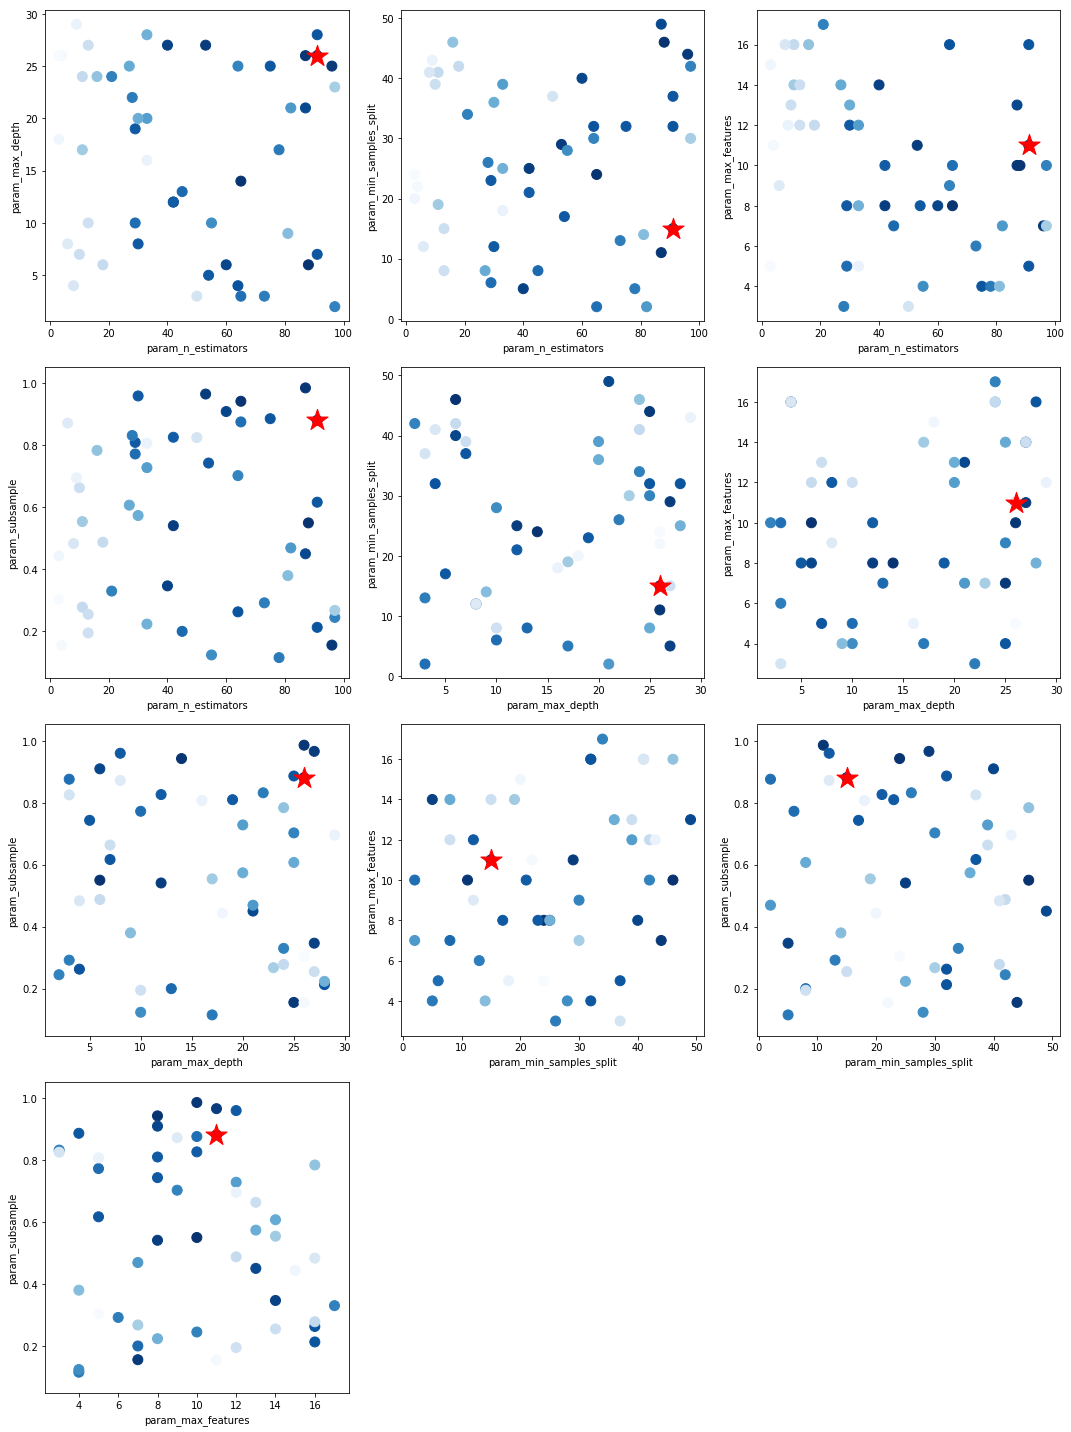

In [9]:
params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_max_features', 'param_subsample']
gs = gridspec.GridSpec(4,3)
fig = plt.figure(figsize=(15, 20), tight_layout=True)
plt_best = cv_results.head(1)
for idx, params in enumerate(combinations(params, 2)):
    ax = fig.add_subplot(gs[idx])
    plt.scatter(cv_results[params[0]], cv_results[params[1]], c=-np.log(-cv_results['mean_test_score']), s=100, cmap="Blues")
    plt.scatter(plt_best[params[0]], plt_best[params[1]], s=500, marker="*", c="r")
    plt.xlabel(params[0])
    plt.ylabel(params[1])

Inspect feature importance

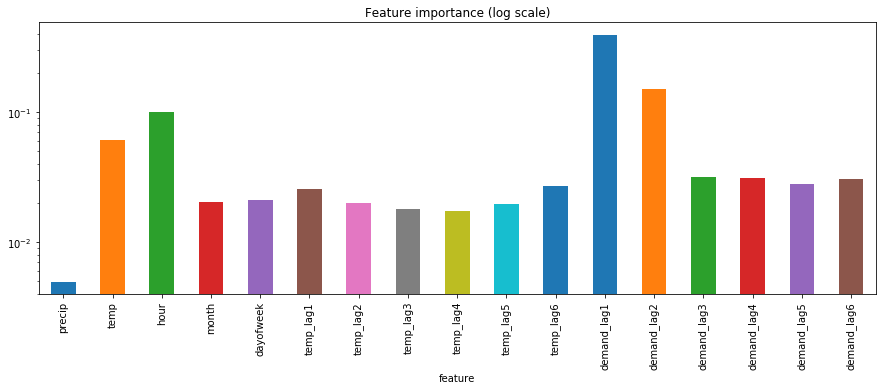

In [11]:
feature_importance = pd.DataFrame.from_dict({'feature':X.columns, 'importance':regr_pipe.named_steps['regr_cv'].best_estimator_.feature_importances_})
feature_importance.plot.bar('feature', 'importance', figsize=(15,5), logy=True, title='Feature importance (log scale)', legend=False)
plt.show()